## Fast Campus DSS+ Algorithm problem 1

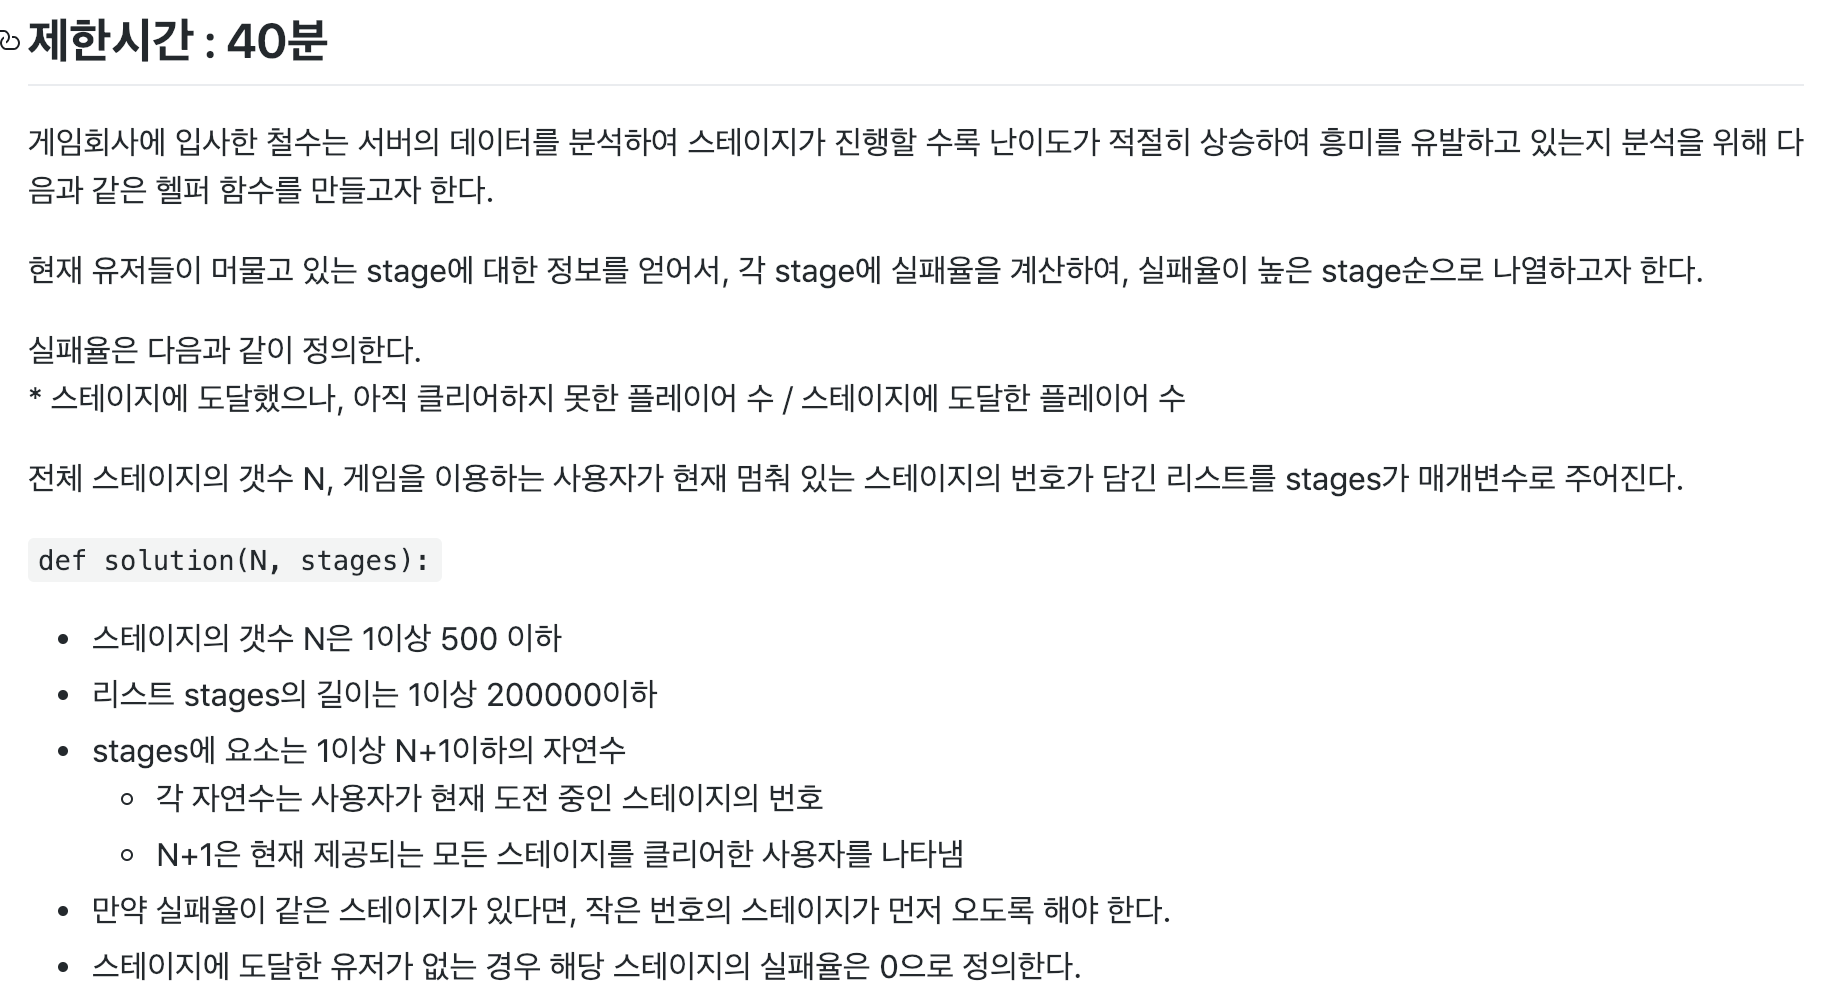

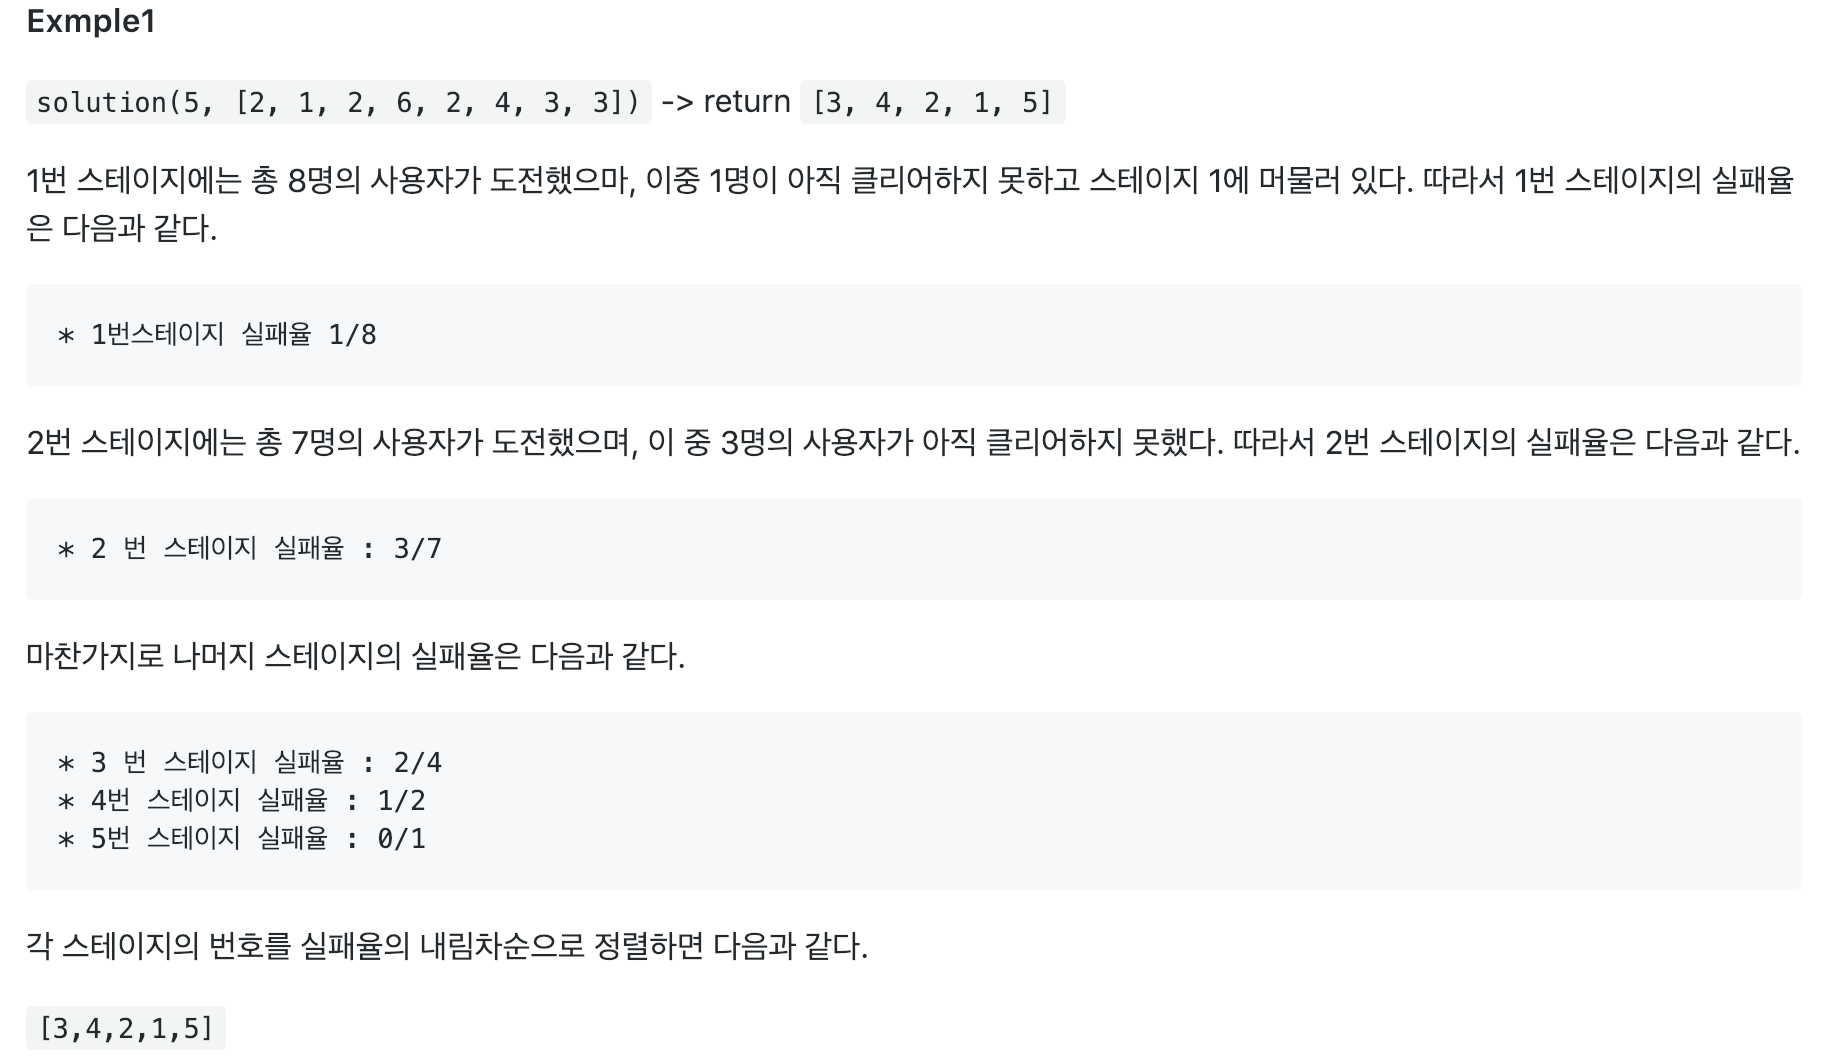

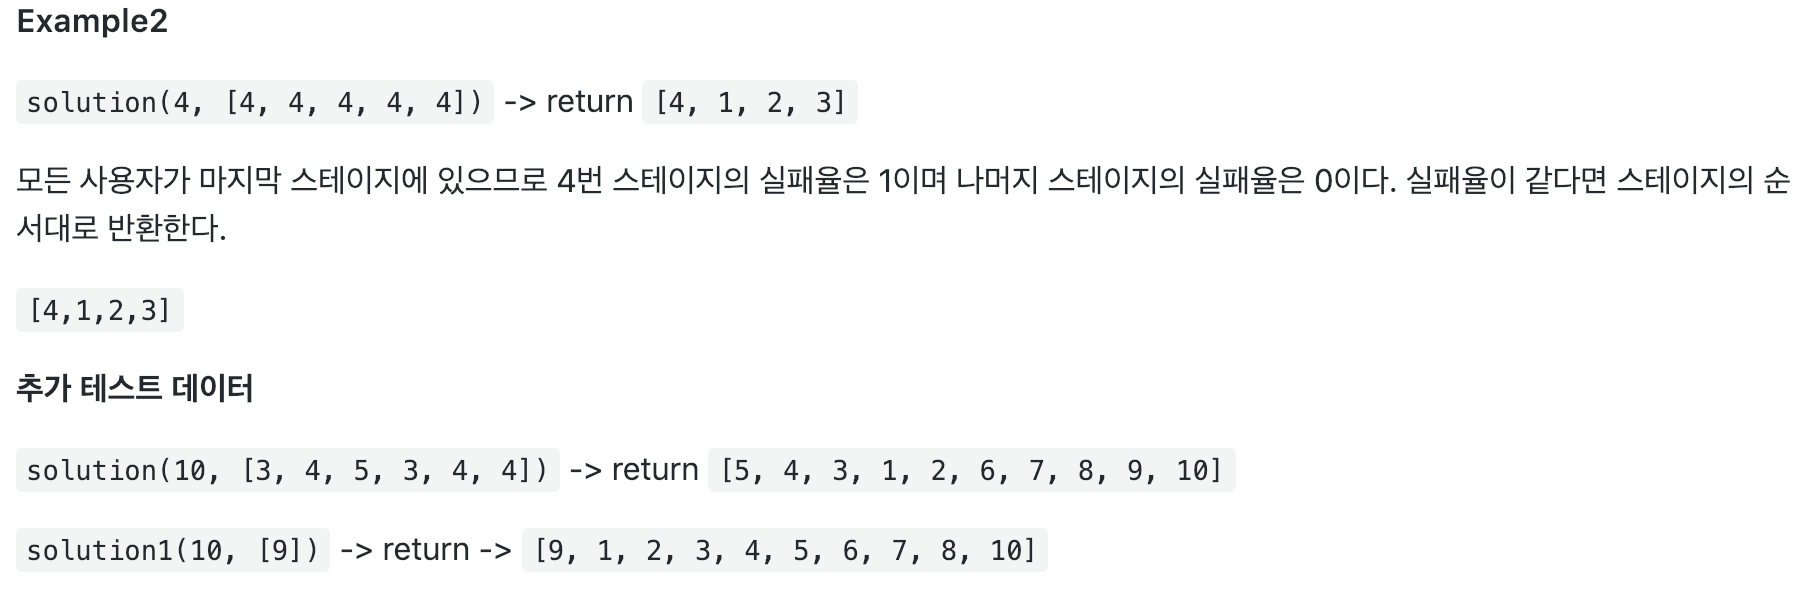

### time complexity : N (스테이지 수) * M (유저 수)
- O (number of stages * number of players)

In [35]:
from collections import Counter
def solution(N, stages):
    counter = Counter(stages)
    res = {x:0 for x in range(1, N+1)}
    n_players = len(stages)
    
    for n in range(1, N+1):
        success_rate = counter[n] / n_players
        res[n] = success_rate
        n_players -= counter[n]
        if not n_players: #prevent 0 division error
            break
    
    return sorted(res, key=lambda x: res[x], reverse=True) #sort by value
    

In [38]:
solution(10, [3, 4, 5, 3, 4, 4]), solution(5, [2, 1, 2, 6, 2, 4, 3, 3]), solution(4, [4, 4, 4, 4, 4])

([5, 4, 3, 1, 2, 6, 7, 8, 9, 10], [3, 4, 2, 1, 5], [4, 1, 2, 3])

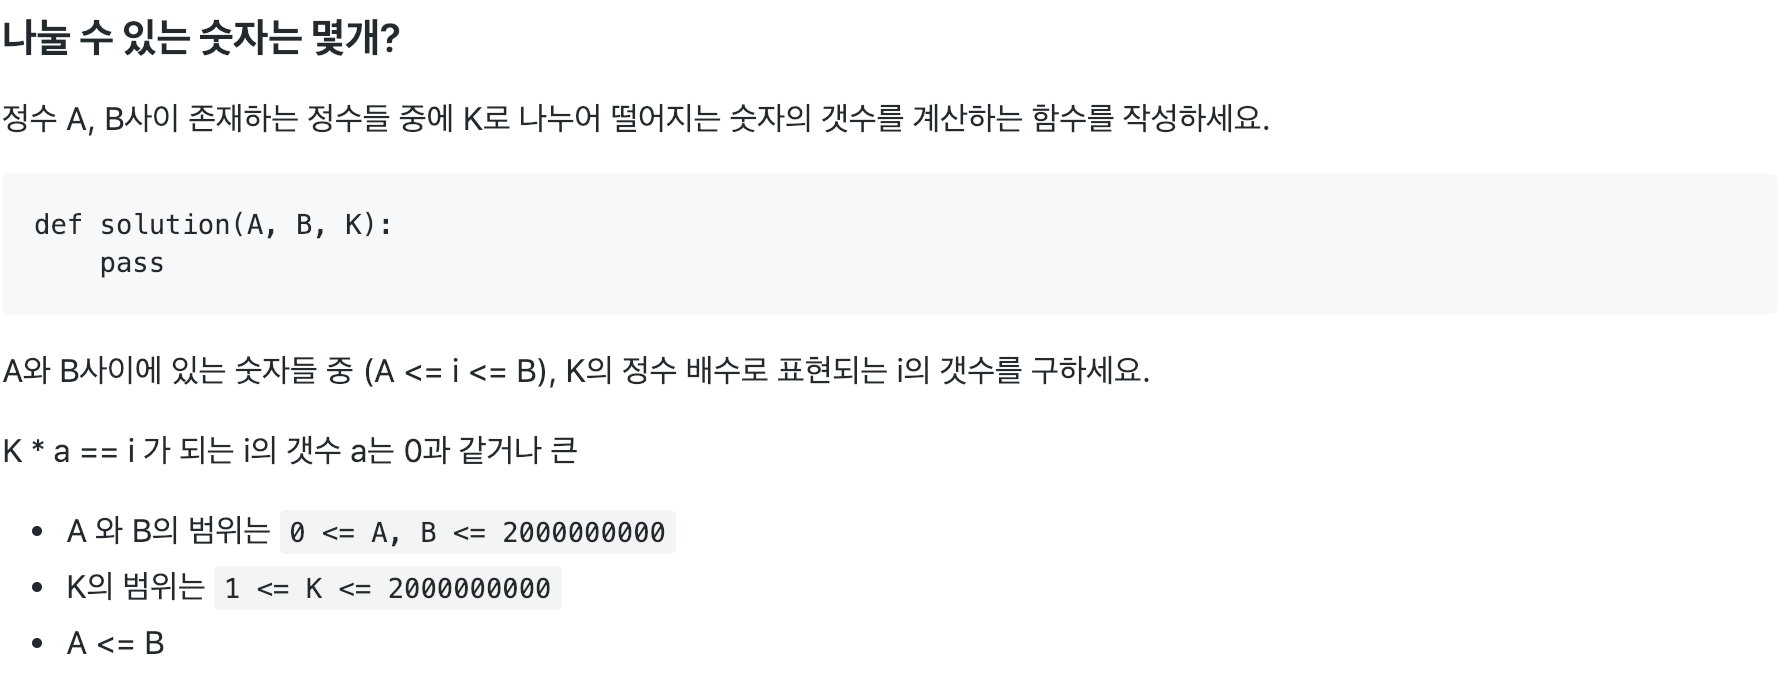

### 1. naive approach - brute force: 
- run a loop from A to B and count all numbers divisible by K
- time complexity of this approach whill be O(m - n)

In [1]:
def solution(A, B, K):
    count = 0
    for number in range(A, B+1):
        if number % K == 0:
            count += 1
    return count

https://www.geeksforgeeks.org/count-total-divisors-b-given-range/

### 2. efficient approach

In [1]:
from math import ceil

In [6]:
def solution(A, B, K):
    start_n = ceil(A/K)
    end_n = B // K
    return len(range(start_n, end_n+1))

### Advanced: Count total divisors of A or B in a given range
- Given four integers m, n, a, b. Find how many integers from range m to n are divisible by a or b

In [45]:
def gcd(x, y): # find greatest common divisor
    if x > y:
        small = y
    else:
        small = x
    for i in range(1, small+1):
        if (x % i == 0) and (y % i == 0):
            gcd = i
    return gcd

def findLCM(a, b): # find least common multiple
    return (a * b) / gcd(a, b)

def solution(m, n, a, b):
    lcm = findLCM(a, b)
    
    a_multiple = len(range(ceil(m/a), n//a+1))
    b_multiple = len(range(ceil(m/b), n//b+1))
    
    # to subtract common multiple from a_multiple + b_multiple to exclude redundant numbers
    common_multiple = ceil(n//lcm - m/lcm) 

    res = a_multiple + b_multiple - common_multiple
    return res


In [46]:
solution(3,11,2,3), solution(11, 1000000, 6, 35)

(6, 190475)